Epoch: 249 ,cost = 0.2811743915081024 
Epoch: 499 ,cost = 0.18751002848148346 
Epoch: 749 ,cost = 0.13679763674736023 
Epoch: 999 ,cost = 0.10934443026781082 
Epoch: 1249 ,cost = 0.09448536485433578 
Epoch: 1499 ,cost = 0.08644486963748932 
Epoch: 1749 ,cost = 0.08209557831287384 
Epoch: 1999 ,cost = 0.07974397391080856 
Epoch: 2249 ,cost = 0.07847345620393753 
Epoch: 2499 ,cost = 0.07778757065534592 
Epoch: 2749 ,cost = 0.07741770893335342 
Epoch: 2999 ,cost = 0.07721856236457825 
Epoch: 3249 ,cost = 0.0771116241812706 
Epoch: 3499 ,cost = 0.07705435156822205 
Epoch: 3749 ,cost = 0.07702383399009705 
Epoch: 3999 ,cost = 0.07700765877962112 
Epoch: 4249 ,cost = 0.07699916511774063 
Epoch: 4499 ,cost = 0.07699477672576904 
Epoch: 4749 ,cost = 0.07699255645275116 
Epoch: 4999 ,cost = 0.07699145376682281 
OPTIMIZATION FINISHED!
Final cost is : 0.07699145376682281 ,weight = 0.2503405213356018 ,bias values = 0.7960926294326782


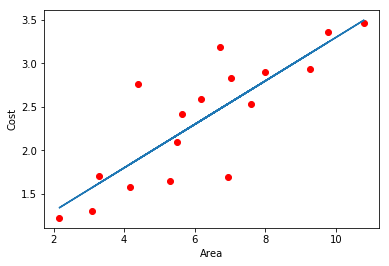

In [51]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
learning_rate = 0.01
training_epochs = 5000
display_step = 250
rng = np.random

train_X = np.asarray(pd.read_csv('./untitled7.csv',header = None, usecols = [0]).values.flatten())
train_Y = np.asarray(pd.read_csv('./untitled7.csv',header = None, usecols = [1]).values.flatten())
m = (np.shape(train_X))[0]    #Size of dataset

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(),name = "weight")
b = tf.Variable(rng.randn(),name = "bias")

pred = tf.add(tf.multiply(X,W),b)

cost = tf.reduce_sum(tf.pow(pred - Y,2))/(2*m)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X,train_Y):
            session.run(optimizer,feed_dict = {X:x, Y:y})
        
        if (epoch+1) % display_step ==0 :
            c = session.run(cost,feed_dict = {X:train_X, Y:train_Y})
            print("Epoch: {} ,cost = {} ".format(epoch,c))
    print("OPTIMIZATION FINISHED!")
    training_cost = session.run(cost,feed_dict = {X:train_X, Y:train_Y})
    print("Final cost is : {} ,weight = {} ,bias values = {}".format(training_cost,session.run(W),session.run(b)))
    plt.plot(train_X,train_Y,'ro')
    plt.plot(train_X, session.run(W) * train_X + session.run(b), label='Fitted line')  
    plt.xlabel("Area")
    plt.ylabel("Cost")  
    plt.show()   
    
            